In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Link to the dataset

    https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
heart = pd.read_csv(r"C:\Users\dell\Desktop\SEM 4\Machine Learning\Project\heart.csv")

## Description of Variables 

        1. age age in years
        2. sex(1 = male; 0 = female)
        3. cp chest pain type
        4. trestbps resting blood pressure (in mm Hg on admission to the hospital)
        5. chol serum cholestoral in mg/dl
        6. fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        7. restecg resting electrocardiographic results
        8. thalach maximum heart rate achieved
        9. exang exercise induced angina (1 = yes; 0 = no)
        10. oldpeak ST depression induced by exercise relative to rest
        11. slope the slope of the peak exercise ST segment
        12. ca number of major vessels (0-3) colored by flourosopy
        13. thal 3 = normal; 6 = fixed defect; 7 = reversable defect
        14. target 1 or 0

In [194]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Basic Observations and plots

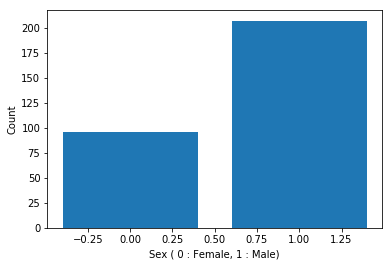

In [275]:
gender, unique = heart.sex.unique(), heart.sex.value_counts()
unique_gender = dict(zip(gender, unique))
plt.bar(unique_gender.keys(), unique_gender.values())
plt.xlabel('Sex ( 0 : Female, 1 : Male)')
plt.ylabel('Count')
plt.show()

In [269]:
women = len(heart[heart.sex == 0])/len(heart)*100
men = len(heart[heart.sex == 1])/len(heart)*100
print("Percent of Women: ", round(women, 2), '%')
print("Percent of Men: ", round(men, 2), '%')

Percent of Women:  31.68 %
Percent of Men:  68.32 %


    The number of female patients are much lower than males

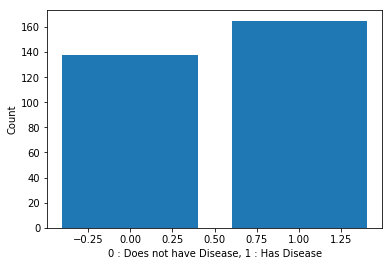

In [274]:
plt.bar(heart.target.unique(), heart.target.value_counts())
plt.xlabel('0 : Does not have Disease, 1 : Has Disease')
plt.ylabel('Count')
plt.show()

In [273]:
no_disease = len(heart[heart.target == 0])/len(heart)*100
disease = len(heart[heart.target == 1])/len(heart)*100
print("People who do not have the disease : ", round(no_disease, 2), '%')
print("People who have the disease : ", round(disease, 2), '%')

People who do not have the disease :  45.54 %
People who have the disease :  54.46 %


    A high number of people suffer from heart diseases

In [229]:
heart.corr().style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
sex,-0.0984466,1,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
cp,-0.068653,-0.0493529,1,0.0476078,-0.0769044,0.094444,0.0444206,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.0567688,0.0476078,1,0.123174,0.177531,-0.114103,-0.0466977,0.0676161,0.193216,-0.121475,0.101389,0.0622099,-0.144931
chol,0.213678,-0.197912,-0.0769044,0.123174,1,0.0132936,-0.15104,-0.00993984,0.0670228,0.0539519,-0.00403777,0.0705109,0.098803,-0.0852391
fbs,0.121308,0.0450318,0.094444,0.177531,0.0132936,1,-0.0841891,-0.00856711,0.0256651,0.00574722,-0.0598942,0.137979,-0.0320193,-0.0280458
restecg,-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1,0.0441234,-0.0707329,-0.0587702,0.0930448,-0.0720424,-0.0119814,0.13723
thalach,-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
exang,0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.0960929,-0.14923,0.193216,0.0539519,0.00574722,-0.0587702,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696


    The target variable has a correlation (higher as compared to the other features) with chest pain, maximum heart rate achieved (thalach) and slope
    

In [276]:
corr_matrix = heart.corr()

In [230]:
corr_matrix['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

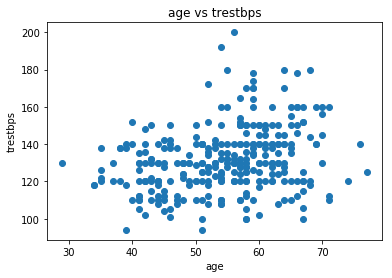

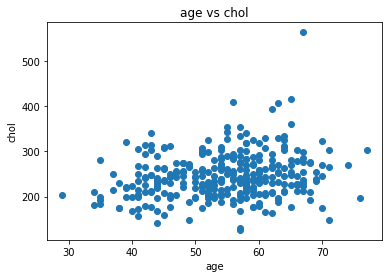

In [242]:
corr = ['trestbps', 'chol']
for att in corr:
    plt.scatter(heart.age, heart[att])
    plt.title('age vs {}'.format(att))
    plt.xlabel('age')
    plt.ylabel(att)
    plt.show()

    age and (trestbps and chol) have a weak correlation, but it is the highest correlation any attribute has with age 

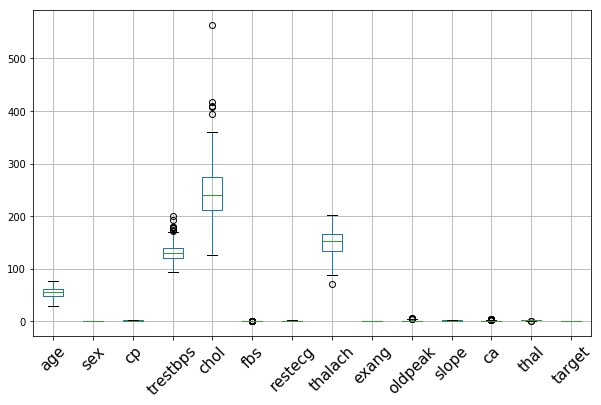

In [252]:
plt.figure(figsize = (10,6))
heart.boxplot()
plt.xticks(rotation = 45, size = 15)
plt.show()

    Most columns have 1's or 0's as there entries.
    trestbps (that is resting blood pressure) has many outliers and so does chol (that is cholestrol)

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### OBSERVATIONS :

    1. The dataset has 303 entries and 14 columns
    2. All the variables are numberical
    3. The dataset does not have any null values

## Transforming the dataset

In [8]:
heart.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
heart.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
heart.slope.unique()

array([0, 2, 1], dtype=int64)

####    One hot encoding using dummy variables

In [21]:
cp_dummies = pd.get_dummies(heart['cp'], prefix = "cp_type")
thal_dummies = pd.get_dummies(heart['thal'], prefix = "thal_type")
slope_dummies = pd.get_dummies(heart['slope'], prefix = "slope_type")

In [25]:
heart_new = pd.concat([heart, cp_dummies, thal_dummies, slope_dummies], axis =1).drop(columns = ['cp', 'thal', 'slope'], axis = 1)

In [30]:
len(list(heart_new))

22

In [29]:
len(list(heart))

14

In [40]:
dependent = heart_new.target
independent = heart_new.drop(['target'], axis = 1)

#### Normalizing the data

In [41]:
ind_normalized = (independent - np.min(independent)) / (np.max(independent) - np.min(independent)).values

In [42]:
ind_normalized.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_type_1,cp_type_2,cp_type_3,thal_type_0,thal_type_1,thal_type_2,thal_type_3,slope_type_0,slope_type_1,slope_type_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
independent.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_type_1,cp_type_2,cp_type_3,thal_type_0,thal_type_1,thal_type_2,thal_type_3,slope_type_0,slope_type_1,slope_type_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Splitting the dataset into training and testing sets 

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(ind_normalized, dependent, test_size = 0.2, shuffle = True)

#### Making a dictionary to store model accuracy scores

In [330]:
accuracies = {}

## Logistic Regression

In [337]:
from sklearn.linear_model import LogisticRegression

In [338]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
print("train score:", log_reg.score(X_train, Y_train))
print("test score:", log_reg.score(X_test, Y_test))

train score: 0.8553719008264463
test score: 0.8360655737704918


C:\Users\dell\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    The train and test scores do not have an extreme difference, which means that the model is not overfitting a lot on the training data

In [339]:
accuracies['Logistic Regression'] = round(log_reg.score(X_test, Y_test), 2)

##  K-Nearest Neighbors

In [343]:
from sklearn.neighbors import KNeighborsClassifier

In [344]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
print("train score:", knn.score(X_train, Y_train))
print("test score:", knn.score(X_test, Y_test))

train score: 0.8925619834710744
test score: 0.8688524590163934


    The train and test scores has difference but it is not extreme, which means that the model is not overfitting too much

In [345]:
accuracies['K-Nearest Neighbors'] = round(knn.score(X_test, Y_test),2)

##  Naive Bayes

In [346]:
from sklearn.naive_bayes import GaussianNB

In [347]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print("train score:", gnb.score(X_train, Y_train))
print("test score:", gnb.score(X_test, Y_test))

train score: 0.8471074380165289
test score: 0.8852459016393442


    The test scores are slightly higher than the train scores which means the model is working well on unseen data 

In [348]:
accuracies['Gaussian NB'] = round(gnb.score(X_test, Y_test),2)

##  Support Vector Classifiers

In [349]:
from sklearn.svm import SVC

In [350]:
svc = SVC()
svc.fit(X_train, Y_train)
print("train score:", svc.score(X_train, Y_train))
print("test score:", svc.score(X_test, Y_test))

train score: 0.8677685950413223
test score: 0.8524590163934426


C:\Users\dell\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    The training score is greater than the test score but they do not have an extreme difference, which means that the model is not overfitting

In [351]:
accuracies['Support Vector Machine'] = round(svc.score(X_test, Y_test),2)

## Decision Trees

In [352]:
from sklearn.tree import DecisionTreeClassifier

In [353]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)
print("train score:", dec_tree.score(X_train, Y_train))
print("test score:", dec_tree.score(X_test, Y_test))

train score: 1.0
test score: 0.7213114754098361


    The training score is perfect while the testing score is much lesser, this is a classic example of model overfitting.
    Decision trees face overfitting because the model tends to build a tree that perfectly classifies the training set, this       can be avoided by :
    1. Pre-pruning : stopping the growth of the decision tree before it classifies data perfectly (can be done by setting           max_depth to some number)
    2. Post-pruning : letting the tree grow to perfection and then reducing it by evaluating the significance of each feature
    3. Bagging : taking an average of all predictions from different decision trees, in this case decision trees are independent of each other
    4. Boosting : training multiple weak learners sequentially, each new tree correcting the previous one

In [354]:
accuracies['Decision Trees'] = round(dec_tree.score(X_test, Y_test),2)

## Bagging 

In [355]:
from sklearn.ensemble import BaggingClassifier

In [356]:
b_clf = BaggingClassifier(dec_tree, n_estimators = 15, max_samples = 0.7)
b_clf.fit(X_train, Y_train)
print("train score:", b_clf.score(X_train, Y_train))
print("test score:", b_clf.score(X_test, Y_test))

train score: 0.9752066115702479
test score: 0.819672131147541


    Bagging reduced the overfitting and now the model is performing better
    Adjusting the parameters(n_estimators = number of base estimators, max_samples = number of samples chosen from each base estimator) can improve or reduce the accuracy of the algorithm

In [357]:
accuracies['Bagging'] = round(b_clf.score(X_test, Y_test),2)

## Boosting

In [358]:
from sklearn.ensemble import AdaBoostClassifier

In [359]:
adaboost = AdaBoostClassifier(dec_tree)
adaboost.fit(X_train, Y_train)
print("train score:", adaboost.score(X_train, Y_train))
print("test score:", adaboost.score(X_test, Y_test))

train score: 1.0
test score: 0.7213114754098361


    For this dataset bagging works better than boosting because boosting did not reduce the training score and the model continues to overfit on the training set

In [360]:
accuracies['Adaboost'] = round(adaboost.score(X_test, Y_test),2)

## Random Forest

In [361]:
from sklearn.ensemble import RandomForestClassifier

In [362]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
print("train score:", random_forest.score(X_train, Y_train))
print("test score:", random_forest.score(X_test, Y_test))

train score: 0.987603305785124
test score: 0.8032786885245902


C:\Users\dell\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [363]:
accuracies['Random Forest'] = round(random_forest.score(X_test, Y_test),2)

    1. The test score is much lower than the training score, in fact the training score is almost 1 which means the model is overfitting and thus is not working very well on unseen data.
    2. Random forests are a collection of decision trees, each tree does a better job at predicting but often the model overfits, this can be avoided by taking an aggregate of the results.

## Random Forest using K cross validation

In [364]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, Y_train, cv = 5)
print("avg train score:", scores.mean()) 
scores = cross_val_score(random_forest, X_test, Y_test, cv = 5)
print("avg test score:", scores.mean()) 

avg train score: 0.7852040816326531
avg test score: 0.7551282051282051


    Applying k-fold cross validation on the random forest classifier gave a better result by reducing overfitting

In [365]:
accuracies['Random forest (cross_val)'] = round(scores.mean(), 2)

## Voting CLassifier

In [366]:
from sklearn.ensemble import VotingClassifier

In [367]:
voting_clf = VotingClassifier(estimators = [('lr', log_reg), ('knn', knn), ('gnb', gnb), ('svm', svc), ('rf', random_forest), ('dt', dec_tree)], voting = 'hard')

In [368]:
voting_clf.fit(X_train, Y_train)
voting_clf.fit(X_train, Y_train)
print("train score:", voting_clf.score(X_train, Y_train))
print("test score:", voting_clf.score(X_test, Y_test))

train score: 0.9504132231404959
test score: 0.8360655737704918


C:\Users\dell\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.

    The voting classifier (voting = hard) is overfitting the training set

In [369]:
voting_clf2 = VotingClassifier(estimators = [('lr', log_reg), ('knn', knn), ('gnb', gnb), ('svm', svc), ('rf', random_forest)], voting = 'hard')

In [370]:
voting_clf2.fit(X_train, Y_train)
voting_clf2.fit(X_train, Y_train)
print("train score:", voting_clf2.score(X_train, Y_train))
print("test score:", voting_clf2.score(X_test, Y_test))

train score: 0.8801652892561983
test score: 0.8688524590163934


C:\Users\dell\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.

    The voting classifier (voting = hard) after removing the decision tree classifier gives a much better output

In [371]:
accuracies['Voting Classifier(Hard)'] = round(voting_clf2.score(X_test, Y_test), 2)

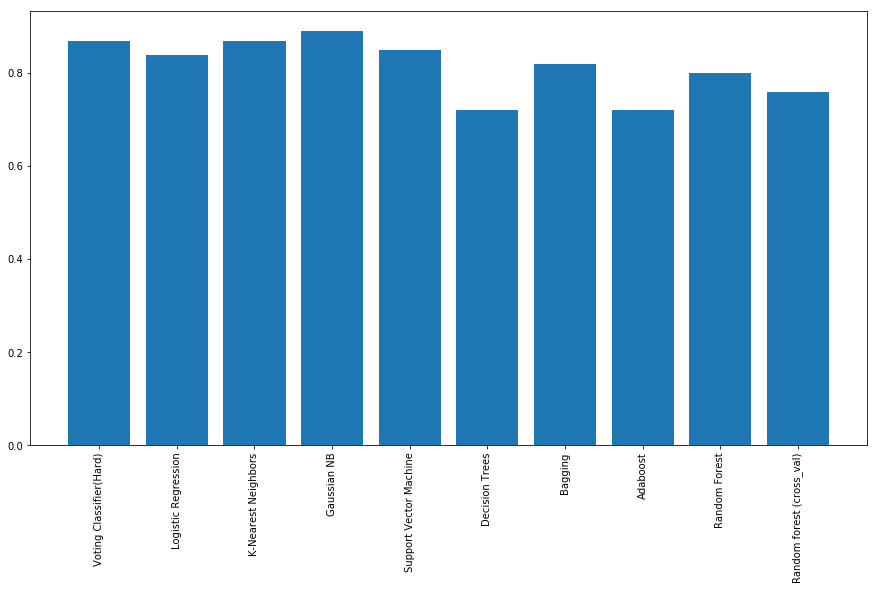

In [372]:
plt.figure(figsize = (15, 8))
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation = 90)
plt.show()

    It is clear that for this particular model Gaussian Naive Bayes is the best model followed by voting classifiers and       K-Nearest Neighbors
    GNB gives an accuracy score of 89% which is higher than all other models

In [374]:
accuracies

{'Voting Classifier(Hard)': 0.87,
 'Logistic Regression': 0.84,
 'K-Nearest Neighbors': 0.87,
 'Gaussian NB': 0.89,
 'Support Vector Machine': 0.85,
 'Decision Trees': 0.72,
 'Bagging': 0.82,
 'Adaboost': 0.72,
 'Random Forest': 0.8,
 'Random forest (cross_val)': 0.76}